In [1]:
import numpy as np
from model_code import fastModel

In [3]:
import numba

@numba.jit(nopython=True)
def test_runtime(N, M, ß, T, reps):
    
    C = fastModel.create_connection_array_symmetrical(M, True)
    
    for i in range(reps):
        red = fastModel.reduced_model(M=M, N=N,T=T, ß=ß, C=C)
        exp = fastModel.explicit_model(M=M, N=N,T=T, ß=ß, C=C)

# this took 00:04:17, in MATLAB: 00:04:28
# test_runtime(1000, 4, 2.0, 4000, 600)

# this took 00:06:54, in MATLAB: 00:15:15
# test_runtime(1000, 64, 7.0, 4000, 600)

# this took 00:00:46, in MATLAB: 00:01:03
#test_runtime(100, 16, 3.8, 4000, 600)

#==> Python is quite a bit faster for me



In [4]:
# number of ß steps
ß_steps = 10

# upper and lower bounds of ß
ß_info = (2, 8, ß_steps)

# values of m: (for 3: 4, 16, 64)
M_values = 3

# number of samples per parameter combinations
no_of_simulations = 10

# number of agents
N = 100

# number of base iterations
base_iterations = 3

# run the simulation
red, exp = fastModel.SystematicParameterAnalysis(ß_info, M_values, no_of_simulations, N, base_iterations)

In [6]:
# number of ß steps
ß_steps = 7

# upper and lower bounds of ß
ß_info = (3, 9, ß_steps)

# values of m: (for 3: 4, 16, 64)
M_values = 3

# number of samples per parameter combinations
no_of_simulations = 100

# number of agents
N = 50

# number of base iterations
base_iterations = 3

# run the simulation
red, exp = fastModel.SystematicParameterAnalysis(ß_info, M_values, no_of_simulations, N, base_iterations)


In [2]:
red_4_16_64 = np.load("../private/simulation_results/red_ß2bis8_steps60_M3_its3_N100_samples1000.dat", allow_pickle=True)
red_8_32_24 = np.load("../private/simulation_results/red_ß2bis8_steps60_M_8_32_24_its3_N100_samples1000.dat", allow_pickle=True)
red_40_48 = np.load("../private/simulation_results/red_ß2bis8_steps60_M_40_48_its3_N100_samples1000.dat", allow_pickle=True)
red_56 = np.load("../private/simulation_results/red_ß2bis8_steps60_M_56_its3_N100_samples1000.dat", allow_pickle=True)

In [3]:
exp_4_16_64 = np.load("../private/simulation_results/exp_ß2bis8_steps60_M3_its3_N100_samples1000.dat", allow_pickle=True)
exp_8_32_24 = np.load("../private/simulation_results/exp_ß2bis8_steps60_M_8_32_24_its3_N100_samples1000.dat", allow_pickle=True)
exp_40_48 = np.load("../private/simulation_results/exp_ß2bis8_steps60_M_40_48_its3_N100_samples1000.dat", allow_pickle=True)
exp_56 = np.load("../private/simulation_results/exp_ß2bis8_steps60_M_56_its3_N100_samples1000.dat", allow_pickle=True)

In [4]:
red_4_8_16_24_32_64 = np.array([red_4_16_64[:,0,:,:,:],
                                red_8_32_24[:,0,:,:,:],
                                red_4_16_64[:,1,:,:,:],
                                red_8_32_24[:,2,:,:,:],
                                red_8_32_24[:,1,:,:,:],
                                red_40_48[:,0,:,:,:],
                                red_40_48[:,1,:,:,:],
                                red_56[:,0,:,:,:],
                                red_4_16_64[:,2,:,:,:],])
red_4_8_16_24_32_40_48_56_64 = np.transpose(red_4_8_16_24_32_64, (1,0,2,3,4))
red_4_8_16_24_32_40_48_56_64.shape

(60, 9, 1000, 3, 16)

In [5]:
exp_4_8_16_24_32_64 = np.array([exp_4_16_64[:,0,:,:,:], 
                                exp_8_32_24[:,0,:,:,:],
                                exp_4_16_64[:,1,:,:,:],
                                exp_8_32_24[:,2,:,:,:],
                                exp_8_32_24[:,1,:,:,:],
                                exp_40_48[:,0,:,:,:],
                                exp_40_48[:,1,:,:,:],
                                exp_56[:,0,:,:,:],
                                exp_4_16_64[:,2,:,:,:],])
exp_4_8_16_24_32_40_48_56_64 = np.transpose(exp_4_8_16_24_32_64, (1,0,2,3,4))
exp_4_8_16_24_32_40_48_56_64.shape

(60, 9, 1000, 3, 16)

In [6]:
import matplotlib.pyplot as plt
def consensrate_withrespect_M_and_iteration_against_beta(SyPaAn_data, Ms, its, model):

    fig, ax = plt.subplots(figsize=(13, 7))
    fontsize = 14

    number = len(its)+4
    cmap = plt.get_cmap('Blues')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    M = 4

    for i, (color, edgecolor, it) in enumerate(zip(colors[2:-2], colors[4:], its)):
        SyPaAn_data_M = SyPaAn_data[:,0,:,i]
        consensus_rate = np.mean(np.where(SyPaAn_data_M>0.2, 1, 0), axis=1)
        #consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        ax.plot(consensus_rate, lw=3, color = color, marker="o", markeredgewidth=1, markeredgecolor=edgecolor,
                 label=fr"$M = {M}$   at $T = {its[i]*M}$")

    number = len(its)+4
    cmap = plt.get_cmap('Reds')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    M = 16

    for i, (color, edgecolor, it) in enumerate(zip(colors[2:-2], colors[4:], its)):
        SyPaAn_data_M = SyPaAn_data[:,1,:,i]
        consensus_rate = np.mean(np.where(SyPaAn_data_M>0.2, 1, 0), axis=1)
        #consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        ax.plot(consensus_rate, lw=3, color = color, marker="^", markeredgewidth=1, markeredgecolor=edgecolor,
                 label=fr"$M = {M}$ at $T = {its[i]*M}$")


    number = len(its)+4
    cmap = plt.get_cmap('Greys')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    M = 64

    for i, (color, edgecolor, it) in enumerate(zip(colors[2:-2], colors[4:], its)):
        SyPaAn_data_M = SyPaAn_data[:,2,:,i]
        consensus_rate = np.mean(np.where(SyPaAn_data_M>0.2, 1, 0), axis=1)
        #consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        ax.plot(consensus_rate, lw=3, color = color, marker="s", markeredgewidth=1, markeredgecolor=edgecolor,
                 label=fr"$M = {M}$ at $T = {its[i]*M}$")
    
    
    major_ticks = np.arange(0, SyPaAn_data.shape[0], 2)
    minor_ticks = np.arange(0, SyPaAn_data.shape[0], 1)
    major_lbs = np.linspace(2.5, 6.5, int(SyPaAn_data.shape[0]/2)+1).round(2)
    #minor_ticks = np.linspace(2.5, 6.5, SyPaAn_data.shape[0]).round(2)
    
    ax.set_xticks(major_ticks, labels=major_lbs, fontsize=fontsize-1)
    ax.set_xticks(minor_ticks,minor=True)
    ax.set_yticks(np.linspace(0,1,11))
    ax.set_yticks(np.linspace(0,1,21), minor=True)

    ax.grid(which='both', color='0.95')
    
    ax.set_title(fr"Polarization Rate in the {model} model at different M's for different Iteration Lengths", fontsize=fontsize)
    ax.legend(fontsize=fontsize)
    ax.set_xlabel(r"$\beta$", fontsize=fontsize)
    ax.set_ylabel("Polarization Rate", fontsize=fontsize)

    plt.savefig(f"../private/figures/consensrate_withrespect_M_against_beta_{model}_Model.svg", format="svg")
    plt.show()

In [7]:
def consensrate_withrespect_M_and_iteration_against_beta_same_simulation(SyPaAn_data, Ms, its):

    fig = plt.figure(figsize=(13, 7))
    fontsize = 14
    plt.rc('xtick',labelsize=fontsize-1)
    plt.rc('ytick',labelsize=fontsize-1)

    SyPaAn_data = SyPaAn_data[:, :, :, -1, [0,3,15]]

    number = len(its)+4
    cmap = plt.get_cmap('Reds')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    M = 4

    for i, (color, edgecolor, it) in enumerate(zip(colors[2:-2], colors[4:], its)):
        SyPaAn_data_M = SyPaAn_data[:,0,:, i]
        consensus_rate = np.mean(np.where(SyPaAn_data_M>0.2, 1, 0), axis=1)
        #consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        plt.plot(consensus_rate, lw=3, color = color, marker="o", markeredgewidth=1, markeredgecolor=edgecolor,
                 label=fr"Polarization Rate for $M = {M}$ at $T = {its[i]*M}$")
        #label=fr"Consens Rate for $M = {M}$ at $T = {M * 1000}$")

    number = len(Ms)+4
    cmap = plt.get_cmap('Purples')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    M = 16

    for i, (color, edgecolor, it) in enumerate(zip(colors[2:-2], colors[4:], its)):
        SyPaAn_data_M = SyPaAn_data[:,1,:, i]
        consensus_rate = np.mean(np.where(SyPaAn_data_M>0.2, 1, 0), axis=1)
        #consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        plt.plot(consensus_rate, lw=3, color = color, marker="o", markeredgewidth=1, markeredgecolor=edgecolor,
                 label=fr"Polarization Rate for $M = {M}$ at $T = {its[i]*M}$")

    number = len(Ms)+4
    cmap = plt.get_cmap('Blues')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    M = 64

    for i, (color, edgecolor, it) in enumerate(zip(colors[2:-2], colors[4:], its)):
        SyPaAn_data_M = SyPaAn_data[:,2,:, i]
        consensus_rate = np.mean(np.where(SyPaAn_data_M>0.2, 1, 0), axis=1)
        #consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        plt.plot(consensus_rate, lw=3, color = color, marker="o", markeredgewidth=1, markeredgecolor=edgecolor,
                 label=fr"Polarization Rate for $M = {M}$ at $T = {its[i]*M}$")

    plt.xticks(np.arange(0,SyPaAn_data.shape[0],1), np.linspace(2, 7.9, SyPaAn_data.shape[0]).round(2),rotation=90)
    plt.title(fr"Polarization Rate at different M's with different base iterations", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.xlabel(r"$\beta$", fontsize=fontsize)
    plt.ylabel("Polarization Rate", fontsize=fontsize)

    #plt.savefig(f"consensrate_withrespect_M_against_beta{SyPaAn_data[0]['model_type']}.svg", format="svg")
    plt.show()

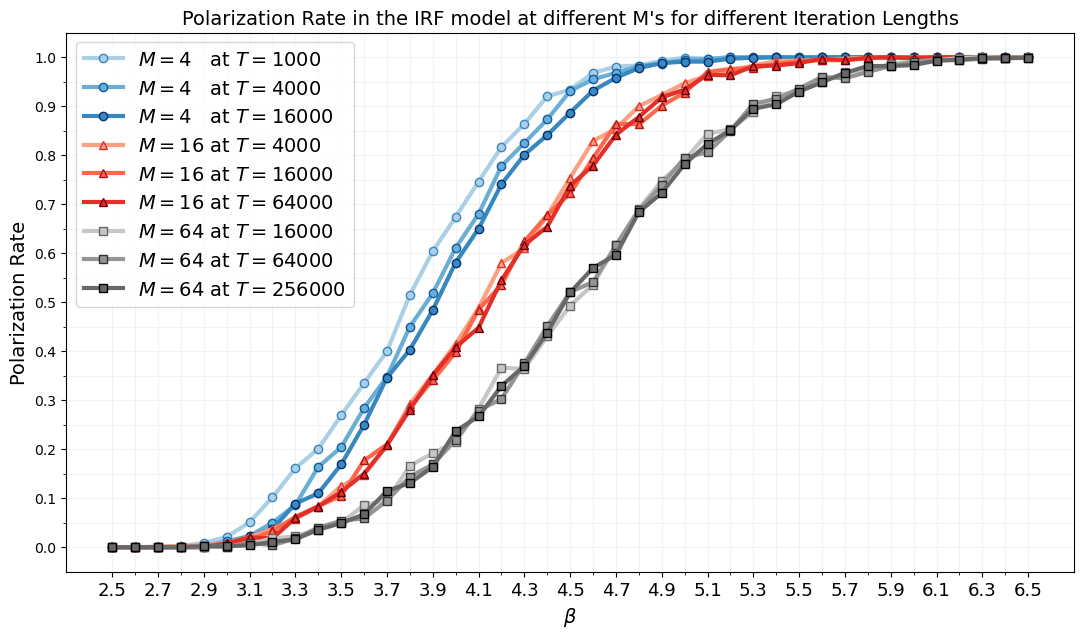

In [8]:
consensrate_withrespect_M_and_iteration_against_beta(red_4_16_64[5:46,:,:,:,-1], Ms=[4,16,64], its=[250,1000,4000], model="IRF")

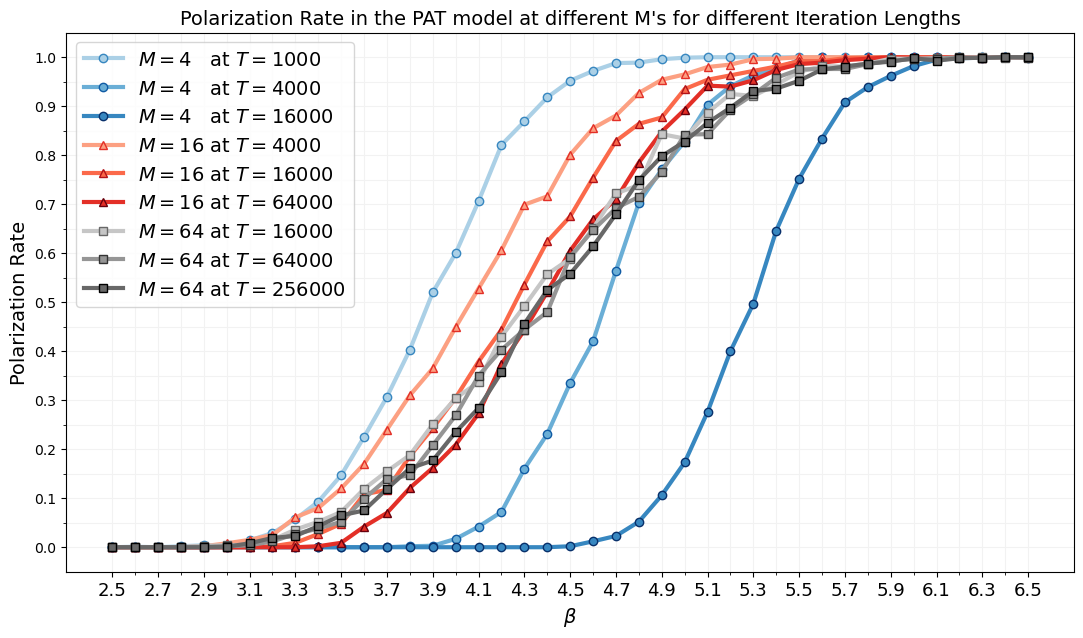

In [9]:
consensrate_withrespect_M_and_iteration_against_beta(exp_4_16_64[5:46,:,:,:,-1], Ms=[4,16,64], its=[250,1000,4000], model="PAT")

In [10]:

def consensrate_withrespect_M_and_iteration_against_beta_3d(SyPaAn_data, Ms, its):

    fig = plt.figure(figsize=(13, 7))
    ax = fig.add_subplot(projection='3d')
    fontsize = 14

    ß = np.linspace(2, 8, SyPaAn_data.shape[0]).round(2)

    number = len(its)+4
    cmap = plt.get_cmap('Blues')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    M = 64

    for i, (color, edgecolor, it) in enumerate(zip(colors[2:-2], colors[4:], its)):
        SyPaAn_data_M = SyPaAn_data[:,2,:,i]
        consensus_rate = np.mean(np.where(SyPaAn_data_M>0.2, 1, 0), axis=1)
        #consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        ax.plot(ß, consensus_rate, lw=3, color = color, marker="o", markeredgewidth=1, markeredgecolor=edgecolor, zs=M, zdir='y',
                label=fr"Polarization Rate for $M = {M}$ at $T = {its[i]*M}$")
        #label=fr"Consens Rate for $M = {M}$ at $T = {M * 1000}$")

    

    number = len(its)+4
    cmap = plt.get_cmap('Purples')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    M = 16

    for i, (color, edgecolor, it) in enumerate(zip(colors[2:-2], colors[4:], its)):
        SyPaAn_data_M = SyPaAn_data[:,1,:,i]
        consensus_rate = np.mean(np.where(SyPaAn_data_M>0.2, 1, 0), axis=1)
        #consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        ax.plot(ß, consensus_rate, lw=3, color = color, marker="o", markeredgewidth=1, markeredgecolor=edgecolor, zs=M, zdir='y',
                 label=fr"Polarization Rate for $M = {M}$ at $T = {its[i]*M}$")
        #label=fr"Consens Rate for $M = {M}$ at $T = {M * 1000}$")


    number = len(its)+4
    cmap = plt.get_cmap('Reds')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    M = 4

    for i, (color, edgecolor, it) in enumerate(zip(colors[2:-2], colors[4:], its)):
        SyPaAn_data_M = SyPaAn_data[:,0,:,i]
        consensus_rate = np.mean(np.where(SyPaAn_data_M>0.2, 1, 0), axis=1)
        #consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        ax.plot(ß, consensus_rate, lw=3, color = color, marker="o", markeredgewidth=1, markeredgecolor=edgecolor, zs=M, zdir='y',
                label=fr"Polarization Rate for $M = {M}$ at $T = {its[i]*M}$")
        #label=fr"Consens Rate for $M = {M}$ at $T = {M * 1000}$")


    #ax.xticks(,rotation=90)
    plt.title(fr"Polarization Rate at different M's with different base iterations", fontsize=fontsize)
    #plt.legend(fontsize=fontsize-4)
    ax.set_xlabel(r"$\beta$", fontsize=fontsize)
    ax.set_zlabel("Polarization Rate", fontsize=fontsize)
    ax.set_ylabel("M", fontsize=fontsize)

    #plt.savefig(f"consensrate_withrespect_M_against_beta{SyPaAn_data[0]['model_type']}.svg", format="svg")
    plt.show()

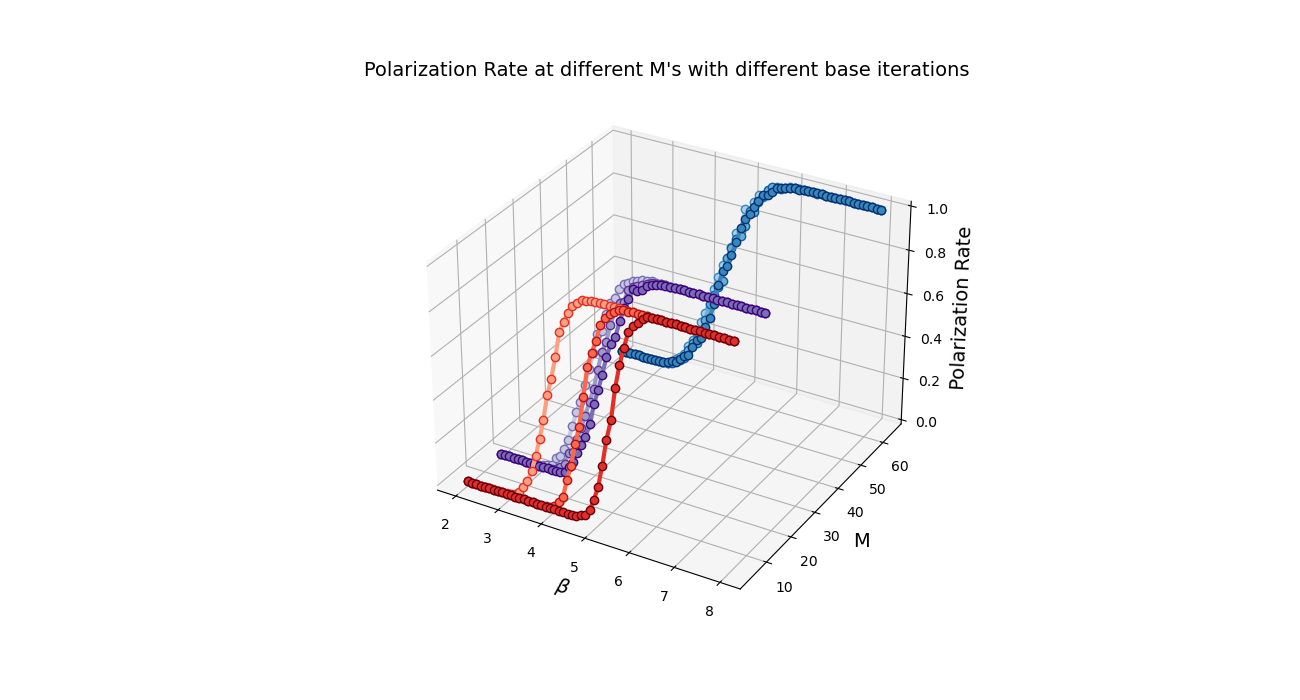

In [6]:
%matplotlib widget
consensrate_withrespect_M_and_iteration_against_beta_3d(exp[:,:,:,:,-1], Ms=[4,16,64], its=[250,1000,4000])

In [10]:
import matplotlib.pyplot as plt
def polarizationrate_withrespect_M(SyPaAn_data_red, SyPaAn_data_exp, Ms):

    fig, ax = plt.subplots(figsize=(13, 7))
    fontsize = 14

    M_to_consens_red = np.zeros(len(Ms))
    M_to_consens_exp = np.zeros(len(Ms))
    
    for m_ind, M in enumerate(Ms):
        # filter data to respective m and lowest t_base
        data_m_early = SyPaAn_data_red[:,m_ind,:,0]
        # calculate the consensus rate for each ß value 
        consensus_rate_early = np.mean(np.where(data_m_early>0.2, 1, 0), axis=1)
        
        # filter data to respective m and highest t_base
        data_m_late = SyPaAn_data_red[:,m_ind,:,-1]
        # calculate the consensus rate for each ß value
        consensus_rate_late = np.mean(np.where(data_m_late>0.2, 1, 0), axis=1)
        
        avg_consensus = np.mean(consensus_rate_early) - np.mean(consensus_rate_late)
        M_to_consens_red[m_ind] = avg_consensus

        # filter data to respective m and lowest t_base
        data_m_early = SyPaAn_data_exp[:,m_ind,:,0]
        # calculate the consensus rate for each ß value 
        consensus_rate_early = np.mean(np.where(data_m_early>0.2, 1, 0), axis=1)

        # filter data to respective m and highest t_base
        data_m_late = SyPaAn_data_exp[:,m_ind,:,-1]
        # calculate the consensus rate for each ß value
        consensus_rate_late = np.mean(np.where(data_m_late>0.2, 1, 0), axis=1)

        avg_consensus = np.mean(consensus_rate_early) - np.mean(consensus_rate_late)

        M_to_consens_exp[m_ind] = avg_consensus
    
    
    ax.plot(Ms, M_to_consens_red, label=fr"IRF Model", color = "teal", marker="^", markersize=7, markeredgewidth=2, markeredgecolor="darkslategray")
    
    ax.plot(Ms, M_to_consens_exp, label=fr"PAT Model", color = "mediumorchid", marker="o", markersize=7, markeredgewidth=2, markeredgecolor="purple")

    ax.set_xticks(np.arange(0,72,8))
    ax.set_xticks(np.arange(0,72,4), minor=True)
    ax.grid(which='both', color='0.95')

    ax.set_title(r"Difference in Average Polarization Rate between $T_{base} = 250$ and $T_{base} = 4000$ in the PAT and IRF model", fontsize=fontsize)
    ax.legend(fontsize=fontsize)
    ax.set_xlabel(r"$M$", fontsize=fontsize)
    ax.set_ylabel(r"$\Delta\ Polarization\ Rate\ (T_{base}=250,\ T_{base}=4000)$", fontsize=fontsize)

    plt.savefig(f"../private/figures/diff_polarizationrate_with_respect_M.svg", format="svg")
    plt.show()

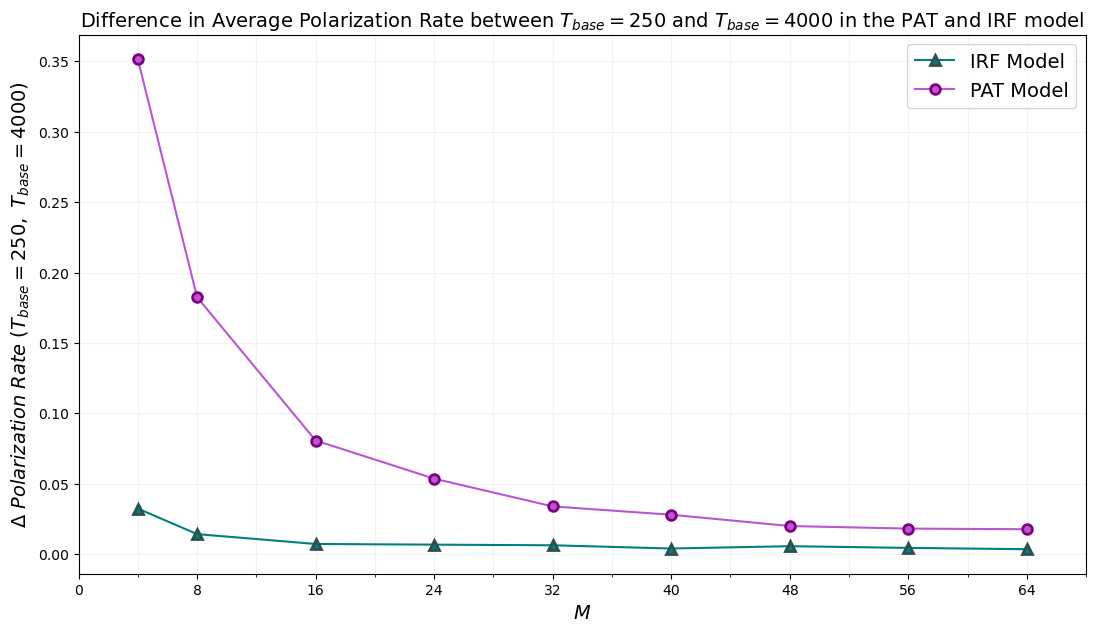

In [11]:
ßstep_min = 5
ßstep_max = 45
polarizationrate_withrespect_M(red_4_8_16_24_32_40_48_56_64[ßstep_min:ßstep_max,:,:,:,-1], exp_4_8_16_24_32_40_48_56_64[ßstep_min:ßstep_max,:,:,:,-1], [4,8,16,24,32,40,48,56,64])